In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    VotingClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv("wineQualityReds.csv")
df.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# Preprocessing
X = df.drop('quality', axis=1)
y = df['quality']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


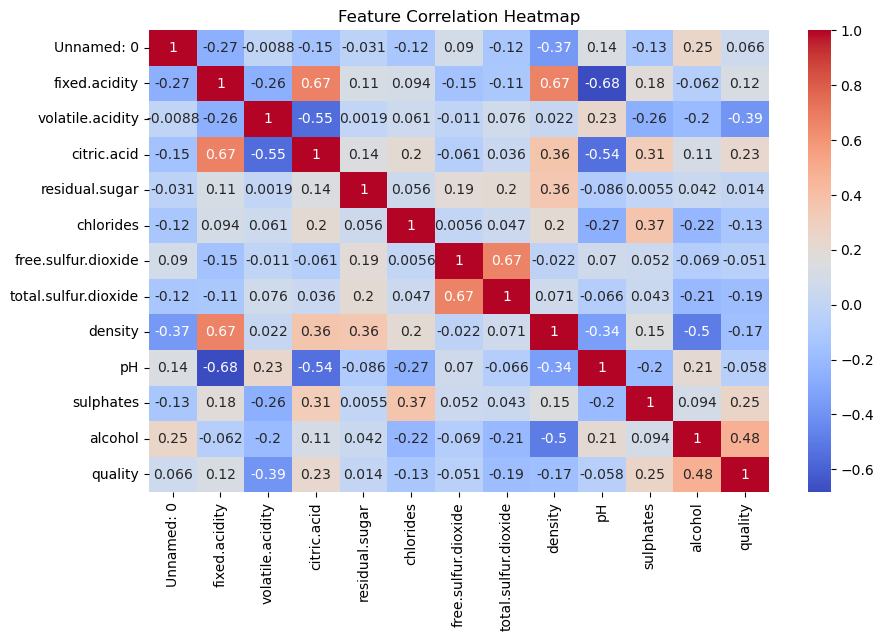

In [7]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [9]:
models = {}

In [13]:
# Bagging with Decision Tree
bag_dt = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bag_dt.fit(X_train, y_train)
models['Bagging (DT)'] = bag_dt

In [15]:
# Bagging with GaussianNB
bag_nb = BaggingClassifier(estimator=GaussianNB(), n_estimators=50, random_state=42)
bag_nb.fit(X_train, y_train)
models['Bagging (GNB)'] = bag_nb

In [17]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
models['Random Forest'] = rf

In [19]:
# Voting Classifier
vote = VotingClassifier(estimators=[
    ('rf', rf),
    ('gnb', GaussianNB()),
    ('lr', LogisticRegression())
], voting='hard')
vote.fit(X_train, y_train)
models['Voting'] = vote

In [21]:
# AdaBoost
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
models['AdaBoost'] = ada

In [23]:
# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
models['Gradient Boosting'] = gb

In [25]:
models

{'Bagging (DT)': BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50,
                   random_state=42),
 'Bagging (GNB)': BaggingClassifier(estimator=GaussianNB(), n_estimators=50, random_state=42),
 'Random Forest': RandomForestClassifier(random_state=42),
 'Voting': VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                              ('gnb', GaussianNB()),
                              ('lr', LogisticRegression())]),
 'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
 'Gradient Boosting': GradientBoostingClassifier(random_state=42)}

In [27]:
accuracies = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

Bagging (DT) Accuracy: 0.6813
Bagging (GNB) Accuracy: 0.5500
Random Forest Accuracy: 0.6875
Voting Accuracy: 0.6156
AdaBoost Accuracy: 0.4938
Gradient Boosting Accuracy: 0.6562


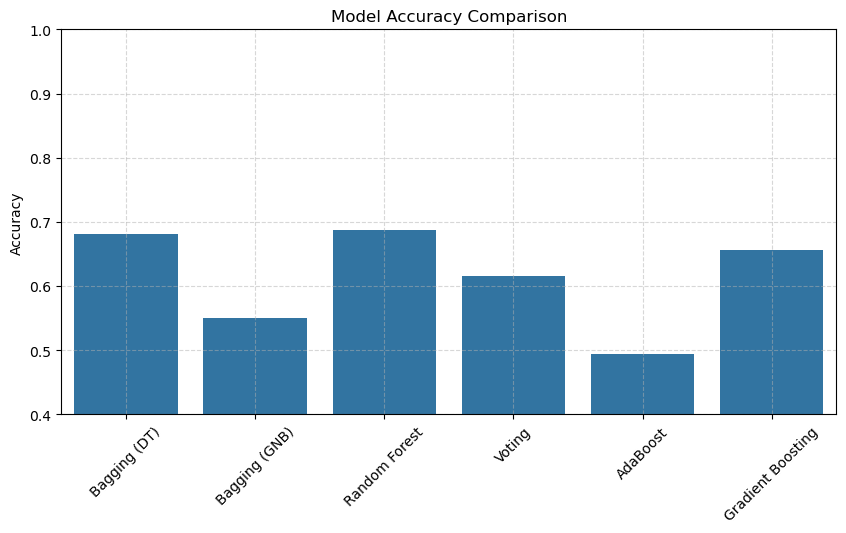

In [29]:
plt.figure(figsize=(10, 5))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.title("Model Accuracy Comparison")
plt.ylim(0.4, 1.0)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

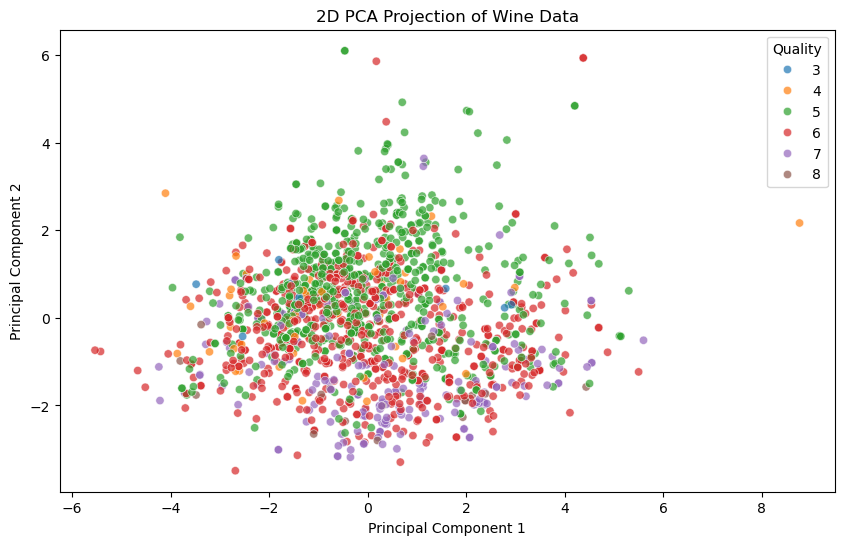

In [31]:
#  PCA 2D Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='tab10', alpha=0.7)
plt.title("2D PCA Projection of Wine Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Quality')
plt.show()


In [33]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)

print(f"KNN Accuracy: {acc_knn:.4f}")
models['KNN'] = knn
accuracies['KNN'] = acc_knn


KNN Accuracy: 0.5969


In [35]:
# Logistic Regression (Multiclass)
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)
acc_log = accuracy_score(y_test, y_pred_log)

print(f"Logistic Regression Accuracy: {acc_log:.4f}")
models['Logistic Regression'] = logreg
accuracies['Logistic Regression'] = acc_log


Logistic Regression Accuracy: 0.5875


In [37]:
# Support Vector Machine (SVC)
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
acc_svc = accuracy_score(y_test, y_pred_svc)

print(f"SVM Accuracy: {acc_svc:.4f}")
models['SVM'] = svc
accuracies['SVM'] = acc_svc


SVM Accuracy: 0.6031


In [39]:
# Linear Regression (Regression Task)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Use original, non-binarized target
X_reg = df.drop('quality', axis=1)
y_reg = df['quality']

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

linreg = LinearRegression()
linreg.fit(X_train_r, y_train_r)
y_pred_lr = linreg.predict(X_test_r)

mse = mean_squared_error(y_test_r, y_pred_lr)
r2 = r2_score(y_test_r, y_pred_lr)

print(f"Linear Regression MSE: {mse:.4f}")
print(f"Linear Regression R² Score: {r2:.4f}")


Linear Regression MSE: 0.3878
Linear Regression R² Score: 0.4065


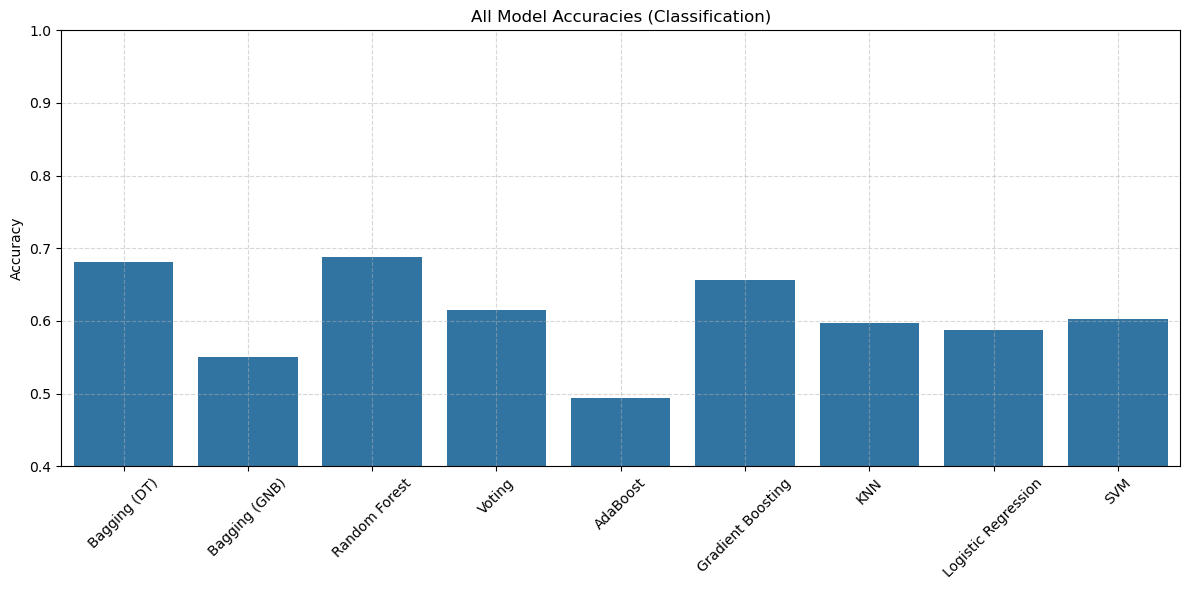

In [41]:
# Updated accuracy comparison bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.ylabel("Accuracy")
plt.title("All Model Accuracies (Classification)")
plt.xticks(rotation=45)
plt.ylim(0.4, 1.0)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
